In [0]:
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.functions import col, split,array, col, explode, lit, struct, regexp_extract, expr
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from typing import Iterable
storage_account_name = "lifeexpectancystore"
storage_account_access_key = "lifeexpectancystore-key"
my_scope = "lifeexpectancy-secret"
my_key = "lifeexpectancystore-key"

file_location = "https://lifeexpectancystore.blob.core.windows.net/gdp-data/gdp-csv/gdp_per_capita.csv"
life_uri = "abfss://lifeexpectancy-data@lifeexpectancystore.dfs.core.windows.net/"
gdp_uri = "abfss://gdp-data@lifeexpectancystore.dfs.core.windows.net/"
spark.conf.set(
  "fs.azure.account.key."+storage_account_name+".dfs.core.windows.net",dbutils.secrets.get(scope=my_scope, key=my_key))

life_df = spark.read.format("csv").option("inferSchema", "true").option("header","true").load(life_uri +"lifeexpectancy-csv/lifeexpectancy.csv")

gdp_df = spark.read.format("csv").option("inferSchema", "true").option("header","true").load(gdp_uri +"gdp-csv/gdp_per_capita.csv")



In [0]:
#Cleaning life expectancy df
select_columns = ["SpatialDimType","SpatialDim","ParentLocationCode","ParentLocation","Dim1","TimeDim","NumericValue"]
clean_life_df = life_df[select_columns]
clean_life_df = clean_life_df.withColumnRenamed("NumericValue", "Lifespan") \
.withColumnRenamed("TimeDim","Year")\
.withColumnRenamed("Dim1","Sex")\
.withColumnRenamed("SpatialDim","Code")
clean_life_df.drop('ParentLocationCode')
display(clean_life_df)

SpatialDimType,Code,ParentLocationCode,ParentLocation,Sex,Year,Lifespan
COUNTRY,AFG,EMR,Eastern Mediterranean,MLE,2000,54.57449
COUNTRY,AFG,EMR,Eastern Mediterranean,MLE,2010,59.60036
COUNTRY,AFG,EMR,Eastern Mediterranean,MLE,2015,61.03658
COUNTRY,AFG,EMR,Eastern Mediterranean,MLE,2019,63.28709
COUNTRY,AFG,EMR,Eastern Mediterranean,FMLE,2000,55.41726
COUNTRY,AFG,EMR,Eastern Mediterranean,FMLE,2010,60.2972
COUNTRY,AFG,EMR,Eastern Mediterranean,FMLE,2015,62.34584
COUNTRY,AFG,EMR,Eastern Mediterranean,FMLE,2019,63.15551
COUNTRY,AFG,EMR,Eastern Mediterranean,BTSX,2000,54.98949
COUNTRY,AFG,EMR,Eastern Mediterranean,BTSX,2010,59.94055


In [0]:
#Cleaning GDP df
gdp_columns = ["Country Name","Code","2000","2010","2015","2019"]
gdp_clean_df = gdp_df[gdp_columns]
display(gdp_clean_df)
def melt_df(
        df: DataFrame,
        id_vars: Iterable[str], value_vars: Iterable[str],
        var_name: str="variable", value_name: str="value") -> DataFrame:
    """Convert :class:`DataFrame` from wide to long format."""

    # Create array<struct<variable: str, value: ...>>
    _vars_and_vals = array(*(
        struct(lit(c).alias(var_name), col(c).alias(value_name))
        for c in value_vars))

    # Add to the DataFrame and explode
    _tmp = df.withColumn("_vars_and_vals", explode(_vars_and_vals))

    cols = id_vars + [
            col("_vars_and_vals")[x].alias(x) for x in [var_name, value_name]]
    return _tmp.select(*cols)

melted_gdp_df = melt_df(gdp_clean_df,["Country Name","Code",],gdp_clean_df.columns[2:6],"Year","GDP")
display(melted_gdp_df)


Country Name,Code,2000,2010,2015,2019
Aruba,ABW,20617.7504673528,23513.527696809,28396.9084228616,null
Africa Eastern and Southern,AFE,713.245921054769,1634.44825309864,1549.03794037642,1530.05917655094
Afghanistan,AFG,null,543.306526178281,556.007220861443,494.179349886029
Africa Western and Central,AFW,525.450342923443,1687.5519789005,1894.3101949536,1777.91867152634
Angola,AGO,556.838631674927,3587.88364462837,4166.97983330278,2809.62608839129
Albania,ALB,1126.68334010717,4094.34838574494,3952.80253807527,5395.65953185375
Andorra,AND,21854.2468030614,40850.2481432297,35770.7767044085,40897.3308728669
Arab World,ARB,2890.22767363068,6512.54155819275,6220.71663600231,6489.04321596317
United Arab Emirates,ARE,33291.3662541838,33893.2638727391,38663.4005026605,42701.4430454782
Argentina,ARG,7708.09911454041,10385.9644319555,13789.060424772,10056.637940265


Country Name,Code,Year,GDP
Aruba,ABW,2000,20617.7504673528
Aruba,ABW,2010,23513.527696809
Aruba,ABW,2015,28396.9084228616
Aruba,ABW,2019,null
Africa Eastern and Southern,AFE,2000,713.245921054769
Africa Eastern and Southern,AFE,2010,1634.44825309864
Africa Eastern and Southern,AFE,2015,1549.03794037642
Africa Eastern and Southern,AFE,2019,1530.05917655094
Afghanistan,AFG,2000,null
Afghanistan,AFG,2010,543.306526178281


In [0]:
#Joining the dataframes and saving csv to azure
joined_df = clean_life_df.join(melted_gdp_df, on=["Code","Year"],how='inner')
joined_df = joined_df.drop("ParentLocationCode")
display(joined_df)


joined_df.coalesce(1).write.option('header',True).mode('overwrite').csv(life_uri+"Joined_Life_GDP")

Code,Year,SpatialDimType,ParentLocation,Sex,Lifespan,Country Name,GDP
AFG,2000,COUNTRY,Eastern Mediterranean,MLE,54.57449,Afghanistan,null
AFG,2010,COUNTRY,Eastern Mediterranean,MLE,59.60036,Afghanistan,543.306526178281
AFG,2015,COUNTRY,Eastern Mediterranean,MLE,61.03658,Afghanistan,556.007220861443
AFG,2019,COUNTRY,Eastern Mediterranean,MLE,63.28709,Afghanistan,494.179349886029
AFG,2000,COUNTRY,Eastern Mediterranean,FMLE,55.41726,Afghanistan,null
AFG,2010,COUNTRY,Eastern Mediterranean,FMLE,60.2972,Afghanistan,543.306526178281
AFG,2015,COUNTRY,Eastern Mediterranean,FMLE,62.34584,Afghanistan,556.007220861443
AFG,2019,COUNTRY,Eastern Mediterranean,FMLE,63.15551,Afghanistan,494.179349886029
AFG,2000,COUNTRY,Eastern Mediterranean,BTSX,54.98949,Afghanistan,null
AFG,2010,COUNTRY,Eastern Mediterranean,BTSX,59.94055,Afghanistan,543.306526178281


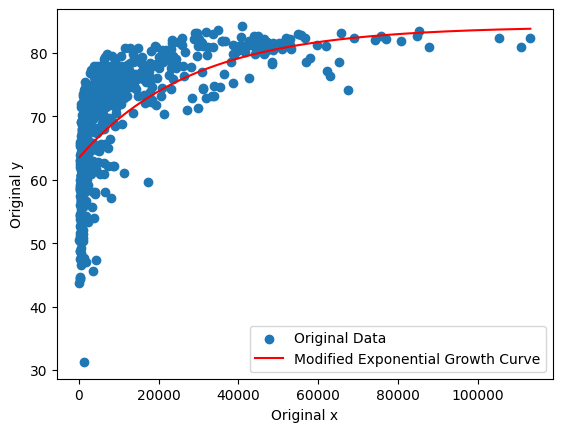

Optimized Parameters:
a: 1.6059510875373926
b: 0.5990631423803576
Covariance Matrix:
[[ 0.03184013 -0.0114983 ]
 [-0.0114983   0.00486347]]


In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#Regression for world data for both genders

df_filtered = joined_df[joined_df['Sex']=='BTSX']
df_filtered = df_filtered.dropna()
# Sample data
x_original = df_filtered.select('GDP').collect()
y_original = df_filtered.select('Lifespan').collect()

# Convert lists to NumPy arrays
x_original = np.array([r[0] for r in x_original], dtype=np.float64)
y_original = np.array([r[0] for r in y_original], dtype=np.float64)

# Normalize only the x-axis values for optimization
scaler_x = StandardScaler()
x_normalized = scaler_x.fit_transform(x_original.reshape(-1, 1)).flatten()

# Normalize the y-axis values for optimization
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y_original.reshape(-1, 1)).flatten()

# Define the modified exponential growth function
def modified_exponential_growth(x, a, b):
    return a * (1 - np.exp(-b * x))

# Initial guesses for parameters
initial_guesses = [np.max(y_normalized), 0.1]

# Fit the modified exponential growth function to the normalized data
params, covariance = curve_fit(modified_exponential_growth, x_normalized, y_normalized, p0=initial_guesses)

# Extract the optimized parameters
a_opt, b_opt = params

# Generate a finer x-axis for smooth curve plotting
x_curve_normalized = np.linspace(min(x_normalized), max(x_normalized), 1000)

# Predictions using the optimized parameters
y_curve_normalized = modified_exponential_growth(x_curve_normalized, a_opt, b_opt)

# Plot the original scatter plot and the modified exponential growth curve with original scales
plt.scatter(x_original, y_original, label='Original Data')
plt.plot(scaler_x.inverse_transform(x_curve_normalized.reshape(-1, 1)), scaler_y.inverse_transform(y_curve_normalized.reshape(-1, 1)), color='red', label='Modified Exponential Growth Curve')
plt.xlabel('Original x')
plt.ylabel('Original y')
plt.legend()
plt.show()

# Display the optimized parameters
print("Optimized Parameters:")
print(f"a: {a_opt}")
print(f"b: {b_opt}")

# Check the covariance matrix to assess the fit
print("Covariance Matrix:")
print(covariance)


In [0]:
from scipy.stats import pearsonr
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
# Assuming x and y are your variables
values = ["BTSX", "MLE","FMLE"]
for value in values:
    df_filtered = joined_df[joined_df['Sex'] == value]
    df_filtered = df_filtered.dropna()
    x = df_filtered.select('GDP').collect()
    y = df_filtered.select('Lifespan').collect()
    x = np.array([r[0] for r in x]).flatten()
    y = np.array([r[0] for r in y]).flatten()
    corr_coefficient, p_value = pearsonr(x, y)
    print("World:")
    print("Sex: " + value)
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}")



World:
Sex: BTSX
Pearson Correlation Coefficient: 0.587045341943201
P-value: 1.2606755672012411e-67
World:
Sex: MLE
Pearson Correlation Coefficient: 0.6049777510674403
P-value: 8.694264322671614e-73
World:
Sex: FMLE
Pearson Correlation Coefficient: 0.5614374100849984
P-value: 8.617000044936704e-61


In [0]:
from scipy.stats import pearsonr
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
values = ["BTSX", "MLE","FMLE"]
for value in values:
    df_filtered = joined_df[joined_df['Sex'] == value]
    df_filtered = df_filtered.dropna()
    x = df_filtered.select('GDP').collect()
    y = df_filtered.select('Lifespan').collect()
    x = np.array([r[0] for r in x]).flatten()
    y = np.array([r[0] for r in y]).flatten()
    grouped = df_filtered.groupBy('ParentLocation').agg(
        F.collect_list('GDP').alias('X_list'),
        F.collect_list('Lifespan').alias('Y_list')
    )
    for row in grouped.collect():
        category = row['ParentLocation']
        x = row['X_list']
        y = row['Y_list']

        corr_coefficient, p_value = pearsonr(x, y)

        print(f"Region: {category} Sex: {value}")
        print(f"Pearson Correlation Coefficient: {corr_coefficient}")
        print(f"P-value: {p_value}\n")

Region: Europe Sex: BTSX
Pearson Correlation Coefficient: 0.7334254974242191
P-value: 4.93755716055571e-35

Region: Western Pacific Sex: BTSX
Pearson Correlation Coefficient: 0.8024562451421893
P-value: 4.457822068438976e-20

Region: Africa Sex: BTSX
Pearson Correlation Coefficient: 0.38675393741578495
P-value: 6.373417302742622e-08

Region: Eastern Mediterranean Sex: BTSX
Pearson Correlation Coefficient: 0.47358830520029105
P-value: 9.127398555695307e-06

Region: Americas Sex: BTSX
Pearson Correlation Coefficient: 0.35975982589045025
P-value: 2.623345517388656e-05

Region: South-East Asia Sex: BTSX
Pearson Correlation Coefficient: 0.8180469202156206
P-value: 1.1558992889576014e-10

Region: Europe Sex: MLE
Pearson Correlation Coefficient: 0.7388979675462736
P-value: 8.590885090559572e-36

Region: Western Pacific Sex: MLE
Pearson Correlation Coefficient: 0.8189142973477257
P-value: 1.7927461037653466e-21

Region: Africa Sex: MLE
Pearson Correlation Coefficient: 0.3599155336997579
P-valu

In [0]:
from scipy.stats import pearsonr
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
#Male correlation per region
df_filtered = joined_df[joined_df['Sex'] == 'MLE']
df_filtered = df_filtered.dropna()
x = df_filtered.select('GDP').collect()
y = df_filtered.select('Lifespan').collect()
x = np.array([r[0] for r in x]).flatten()
y = np.array([r[0] for r in y]).flatten()
grouped = df_filtered.groupBy('ParentLocation').agg(
    F.collect_list('GDP').alias('X_list'),
    F.collect_list('Lifespan').alias('Y_list')
)

for row in grouped.collect():
    category = row['ParentLocation']
    x = row['X_list']
    y = row['Y_list']

    corr_coefficient, p_value = pearsonr(x, y)

    print(f"Region: {category}")
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}\n")

Region: Europe
Pearson Correlation Coefficient: 0.7388979675462736
P-value: 8.590885090559572e-36

Region: Western Pacific
Pearson Correlation Coefficient: 0.8189142973477257
P-value: 1.7927461037653466e-21

Region: Africa
Pearson Correlation Coefficient: 0.3599155336997579
P-value: 5.609146603686775e-07

Region: Eastern Mediterranean
Pearson Correlation Coefficient: 0.5387733535237818
P-value: 2.530236814003207e-07

Region: Americas
Pearson Correlation Coefficient: 0.35788742982130245
P-value: 2.9091777966032388e-05

Region: South-East Asia
Pearson Correlation Coefficient: 0.8249706797949423
P-value: 5.89872836444749e-11



In [0]:
from scipy.stats import pearsonr
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
#Female correlation per region
df_filtered = joined_df[joined_df['Sex'] == 'FMLE']
df_filtered = df_filtered.dropna()
x = df_filtered.select('GDP').collect()
y = df_filtered.select('Lifespan').collect()
x = np.array([r[0] for r in x]).flatten()
y = np.array([r[0] for r in y]).flatten()
grouped = df_filtered.groupBy('ParentLocation').agg(
    F.collect_list('GDP').alias('X_list'),
    F.collect_list('Lifespan').alias('Y_list')
)

for row in grouped.collect():
    category = row['ParentLocation']
    x = row['X_list']
    y = row['Y_list']

    corr_coefficient, p_value = pearsonr(x, y)

    print(f"Region: {category}")
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}\n")

Region: Europe
Pearson Correlation Coefficient: 0.7019932885834637
P-value: 5.220641149806903e-31

Region: Western Pacific
Pearson Correlation Coefficient: 0.7737786906357579
P-value: 6.200730620563935e-18

Region: Africa
Pearson Correlation Coefficient: 0.4119358442994964
P-value: 6.8854421637174335e-09

Region: Eastern Mediterranean
Pearson Correlation Coefficient: 0.4275171244718345
P-value: 7.64427886879185e-05

Region: Americas
Pearson Correlation Coefficient: 0.35079758119154286
P-value: 4.278695026413215e-05

Region: South-East Asia
Pearson Correlation Coefficient: 0.7780607219019879
P-value: 3.457711731144626e-09



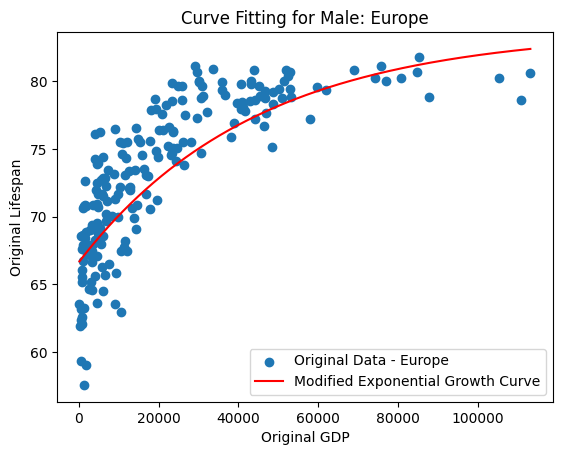

Optimized Parameters for Group Europe:
a: 1.8970596469841323
b: 0.5111846998496401
Covariance Matrix:
[[ 0.10138378 -0.0250052 ]
 [-0.0250052   0.00682675]]
Region: Europe
Pearson Correlation Coefficient: 0.7388979675462736
P-value: 8.590885090559572e-36



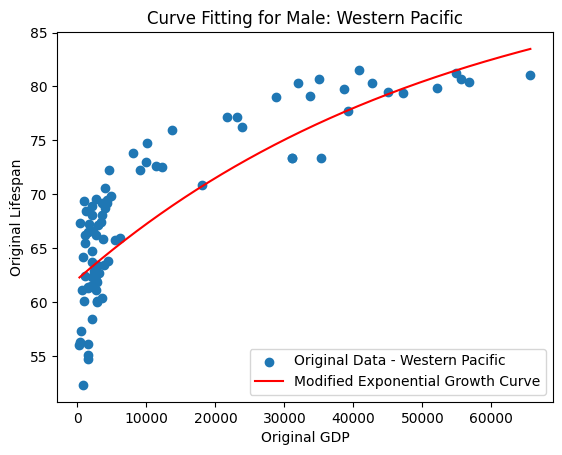

Optimized Parameters for Group Western Pacific:
a: 3.183684164688712
b: 0.3136070895782685
Covariance Matrix:
[[ 1.08134906 -0.11533139]
 [-0.11533139  0.01292988]]
Region: Western Pacific
Pearson Correlation Coefficient: 0.8189142973477257
P-value: 1.7927461037653466e-21



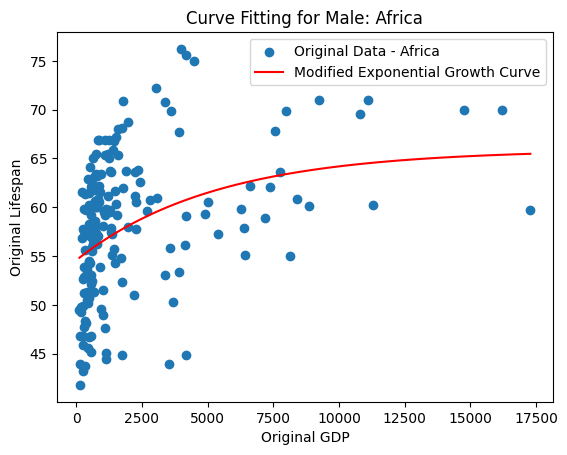

Optimized Parameters for Group Africa:
a: 1.0802396796029354
b: 0.5506760975585961
Covariance Matrix:
[[ 0.2249084  -0.11545837]
 [-0.11545837  0.07031121]]
Region: Africa
Pearson Correlation Coefficient: 0.3599155336997579
P-value: 5.609146603686775e-07



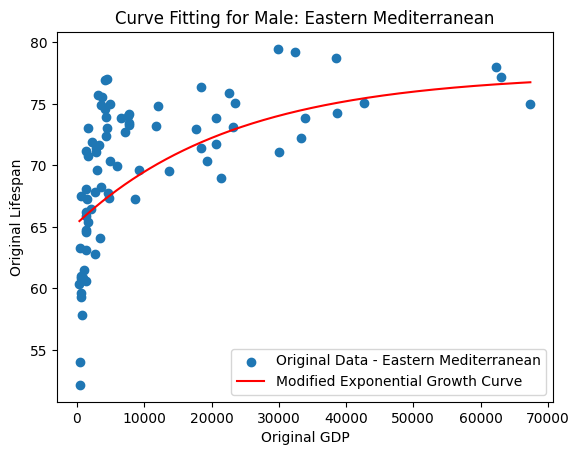

Optimized Parameters for Group Eastern Mediterranean:
a: 1.2900291942192992
b: 0.6327651166007189
Covariance Matrix:
[[ 0.28673488 -0.13057164]
 [-0.13057164  0.06874895]]
Region: Eastern Mediterranean
Pearson Correlation Coefficient: 0.5387733535237818
P-value: 2.530236814003207e-07



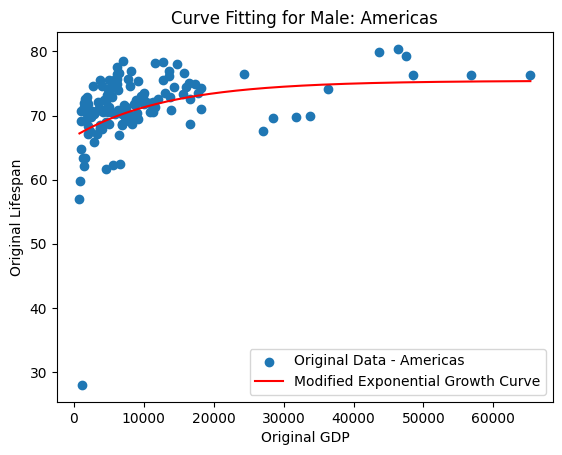

Optimized Parameters for Group Americas:
a: 0.7371419074766469
b: 0.8428617878010669
Covariance Matrix:
[[ 0.13765081 -0.1273018 ]
 [-0.1273018   0.13831938]]
Region: Americas
Pearson Correlation Coefficient: 0.35788742982130245
P-value: 2.9091777966032388e-05



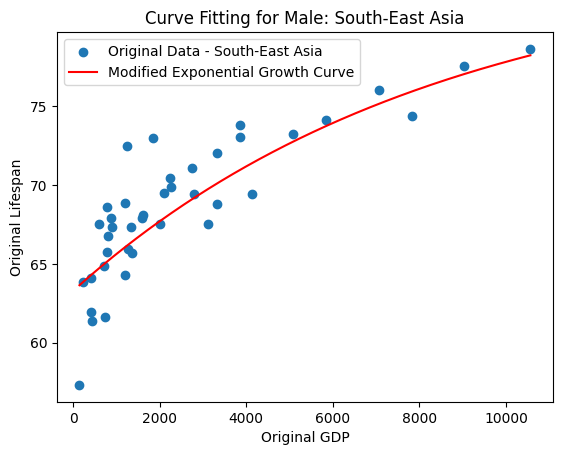

Optimized Parameters for Group South-East Asia:
a: 3.444047734602782
b: 0.29135189942121476
Covariance Matrix:
[[ 2.26654785 -0.20313458]
 [-0.20313458  0.01927042]]
Region: South-East Asia
Pearson Correlation Coefficient: 0.8249706797949423
P-value: 5.89872836444749e-11



In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from pyspark.sql import functions as F
#Regression for males per region

# Sample data
df_filtered = joined_df[joined_df['Sex'] == 'MLE']
df_filtered = df_filtered.dropna()

# Group by 'ParentLocation' and collect lists of 'GDP' and 'Lifespan'
grouped = df_filtered.groupBy('ParentLocation').agg(
    F.collect_list('GDP').alias('X_list'),
    F.collect_list('Lifespan').alias('Y_list')
)

# Iterate over each group
for row in grouped.collect():
    category = row['ParentLocation']
    x_original = np.array(row['X_list'], dtype=np.float64)
    y_original = np.array(row['Y_list'], dtype=np.float64)

    # Normalize only the x-axis values for optimization
    scaler_x = StandardScaler()
    x_normalized = scaler_x.fit_transform(x_original.reshape(-1, 1)).flatten()

    # Normalize the y-axis values for optimization
    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y_original.reshape(-1, 1)).flatten()

    # Define the modified exponential growth function
    def modified_exponential_growth(x, a, b):
        return a * (1 - np.exp(-b * x))

    # Initial guesses for parameters
    initial_guesses = [np.max(y_normalized), 0.1]

    # Fit the modified exponential growth function to the normalized data
    params, covariance = curve_fit(modified_exponential_growth, x_normalized, y_normalized, p0=initial_guesses)

    # Extract the optimized parameters
    a_opt, b_opt = params

    # Generate a finer x-axis for smooth curve plotting
    x_curve_normalized = np.linspace(min(x_normalized), max(x_normalized), 1000)

    # Predictions using the optimized parameters
    y_curve_normalized = modified_exponential_growth(x_curve_normalized, a_opt, b_opt)

    # Plot the original scatter plot and the modified exponential growth curve with original scales
    plt.scatter(x_original, y_original, label=f'Original Data - {category}')
    plt.plot(scaler_x.inverse_transform(x_curve_normalized.reshape(-1, 1)), scaler_y.inverse_transform(y_curve_normalized.reshape(-1, 1)), color='red', label='Modified Exponential Growth Curve')
    plt.xlabel('Original GDP')
    plt.ylabel('Original Lifespan')
    plt.legend()
    plt.title(f'Curve Fitting for Male: {category}')
    plt.show()

    # Display the optimized parameters for each group
    print(f"Optimized Parameters for Group {category}:")
    print(f"a: {a_opt}")
    print(f"b: {b_opt}")

    # Check the covariance matrix to assess the fit
    print("Covariance Matrix:")
    print(covariance)

    # Calculate Pearson correlation coefficient and p-value
    corr_coefficient, p_value = pearsonr(x_original, y_original)
    print(f"Region: {category}")
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}\n")


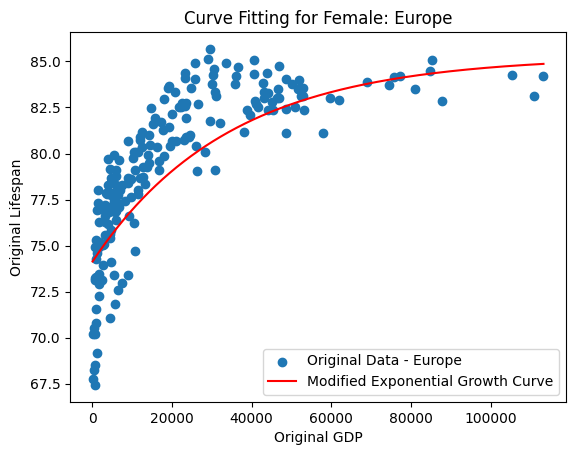

Optimized Parameters for Group Europe:
a: 1.4295325799265812
b: 0.6641007480174357
Covariance Matrix:
[[ 0.05768227 -0.0224427 ]
 [-0.0224427   0.00975249]]
Region: Europe
Pearson Correlation Coefficient: 0.7019932885834637
P-value: 5.220641149806903e-31



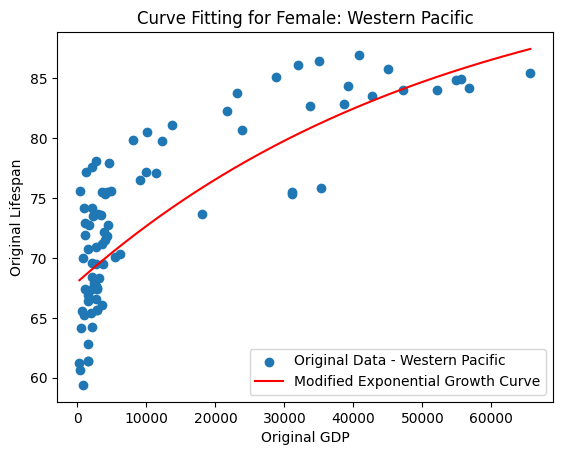

Optimized Parameters for Group Western Pacific:
a: 2.9970465520259255
b: 0.31499628116624373
Covariance Matrix:
[[ 1.33158391 -0.15151396]
 [-0.15151396  0.01812927]]
Region: Western Pacific
Pearson Correlation Coefficient: 0.7737786906357579
P-value: 6.200730620563935e-18



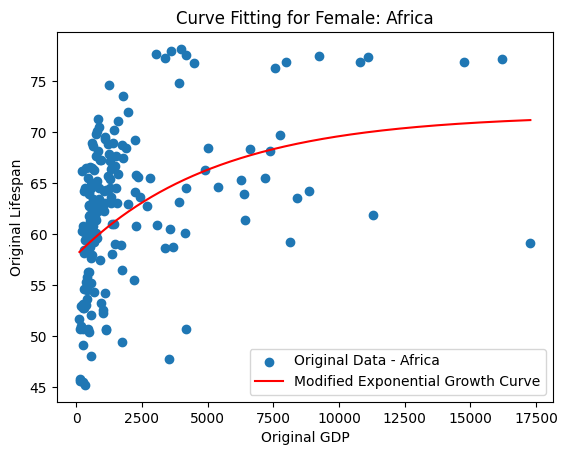

Optimized Parameters for Group Africa:
a: 1.2643422089912226
b: 0.5465455251232461
Covariance Matrix:
[[ 0.21340365 -0.09326948]
 [-0.09326948  0.04832703]]
Region: Africa
Pearson Correlation Coefficient: 0.4119358442994964
P-value: 6.8854421637174335e-09



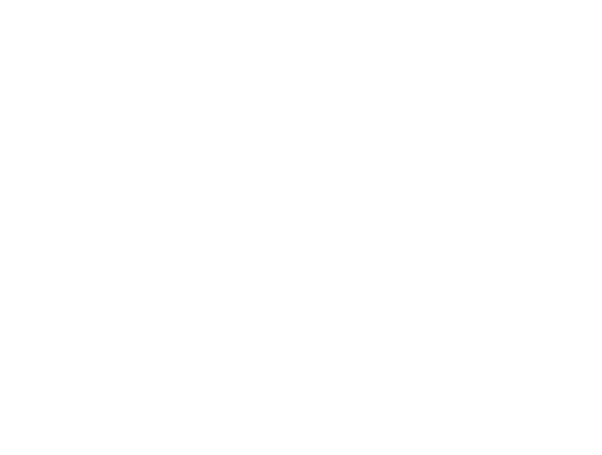

Optimized Parameters for Group Eastern Mediterranean:
a: 0.7100745402397982
b: 1.0109008984702745
Covariance Matrix:
[[ 0.13639791 -0.15103738]
 [-0.15103738  0.1905553 ]]
Region: Eastern Mediterranean
Pearson Correlation Coefficient: 0.4275171244718345
P-value: 7.64427886879185e-05



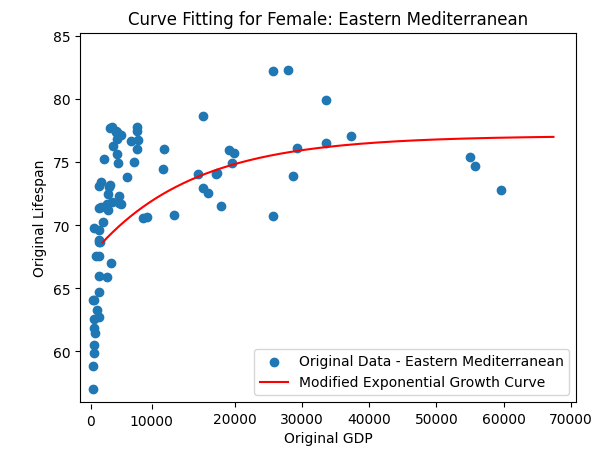

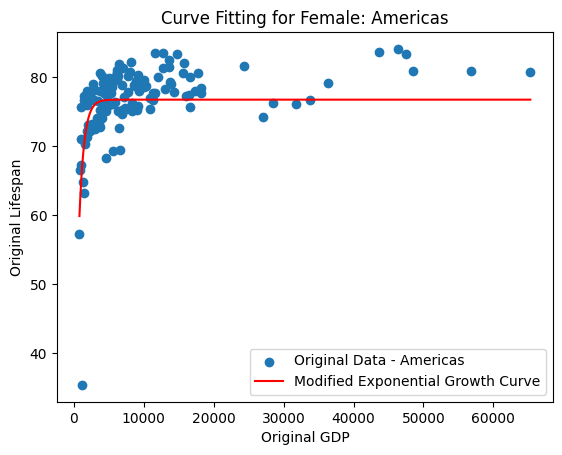

Optimized Parameters for Group Americas:
a: 4.243730066892936e-06
b: 16.285131747182653
Covariance Matrix:
[[ 2.01601160e-10 -5.93000114e-05]
 [-5.93000114e-05  1.74663587e+01]]
Region: Americas
Pearson Correlation Coefficient: 0.35079758119154286
P-value: 4.278695026413215e-05



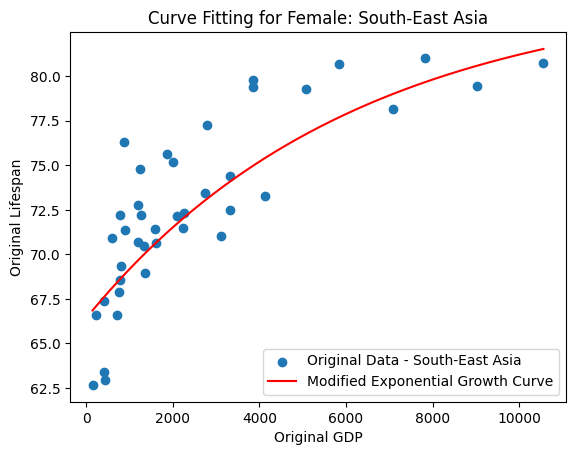

Optimized Parameters for Group South-East Asia:
a: 2.519216776234957
b: 0.3970071094056671
Covariance Matrix:
[[ 0.97366643 -0.15459969]
 [-0.15459969  0.02686798]]
Region: South-East Asia
Pearson Correlation Coefficient: 0.7780607219019879
P-value: 3.457711731144626e-09



In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from pyspark.sql import functions as F
# Regression for females per region

# Sample data
df_filtered = joined_df[joined_df['Sex'] == 'FMLE']
df_filtered = df_filtered.dropna()

# Group by 'ParentLocation' and collect lists of 'GDP' and 'Lifespan'
grouped = df_filtered.groupBy('ParentLocation').agg(
    F.collect_list('GDP').alias('X_list'),
    F.collect_list('Lifespan').alias('Y_list')
)

# Iterate over each group
for row in grouped.collect():
    category = row['ParentLocation']
    x_original = np.array(row['X_list'], dtype=np.float64)
    y_original = np.array(row['Y_list'], dtype=np.float64)

    # Normalize only the x-axis values for optimization
    scaler_x = StandardScaler()
    x_normalized = scaler_x.fit_transform(x_original.reshape(-1, 1)).flatten()

    # Normalize the y-axis values for optimization
    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y_original.reshape(-1, 1)).flatten()

    # Define the modified exponential growth function
    def modified_exponential_growth(x, a, b):
        return a * (1 - np.exp(-b * x))

    # Initial guesses for parameters
    initial_guesses = [np.max(y_normalized), 0.1]

    # Fit the modified exponential growth function to the normalized data
    params, covariance = curve_fit(modified_exponential_growth, x_normalized, y_normalized, p0=initial_guesses)

    # Extract the optimized parameters
    a_opt, b_opt = params

    # Generate a finer x-axis for smooth curve plotting
    x_curve_normalized = np.linspace(min(x_normalized), max(x_normalized), 1000)

    # Predictions using the optimized parameters
    y_curve_normalized = modified_exponential_growth(x_curve_normalized, a_opt, b_opt)

    # Plot the original scatter plot and the modified exponential growth curve with original scales
    plt.scatter(x_original, y_original, label=f'Original Data - {category}')
    plt.plot(scaler_x.inverse_transform(x_curve_normalized.reshape(-1, 1)), scaler_y.inverse_transform(y_curve_normalized.reshape(-1, 1)), color='red', label='Modified Exponential Growth Curve')
    plt.xlabel('Original GDP')
    plt.ylabel('Original Lifespan')
    plt.legend()
    plt.title(f'Curve Fitting for Female: {category}')
    plt.show()

    # Display the optimized parameters for each group
    print(f"Optimized Parameters for Group {category}:")
    print(f"a: {a_opt}")
    print(f"b: {b_opt}")

    # Check the covariance matrix to assess the fit
    print("Covariance Matrix:")
    print(covariance)

    # Calculate Pearson correlation coefficient and p-value
    corr_coefficient, p_value = pearsonr(x_original, y_original)
    print(f"Region: {category}")
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}\n")


In [0]:
#Getting yearly averages
average = (joined_df.groupBy('Year','Sex').agg(F.avg('Lifespan').alias('LifeSpan'),F.avg("GDP").alias("GDP"))
      .orderBy('Year'))
average.show()
      


+----+----+-----------------+------------------+
|Year| Sex|         LifeSpan|               GDP|
+----+----+-----------------+------------------+
|2000| MLE|64.29703562841527| 6401.375341050211|
|2000|BTSX|66.74945655737704| 6401.375341050211|
|2000|FMLE|  69.290494863388| 6401.375341050211|
|2010|BTSX|70.00442912568306|12459.551873639939|
|2010| MLE|67.58002387978144|12459.551873639939|
|2010|FMLE|72.49894633879781|12459.551873639939|
|2015| MLE|69.06552874316938|12552.069160681021|
|2015|FMLE|73.98999885245901|12552.069160681021|
|2015|BTSX|71.50029666666669|12552.069160681021|
|2019|BTSX|72.54058338797813|14118.750698175658|
|2019| MLE|70.13457382513663|14118.750698175658|
|2019|FMLE|74.99699748633881|14118.750698175658|
+----+----+-----------------+------------------+

